<h1> UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE

<h2> DISCIPLINA: ALGORITMOS E ESTRUTURAS DE DADOS II

<h3> Grupo: 
<h3>Rychardson Ribeiro de Souza
<h3>Thiago Jordão Melo da Costa
    

In [ ]:
!pip install nxviz=='0.6.3'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
# Install requirements for scripts
# !pip install -r "/content/requeriments.txt"

# Download csv files from sources
!python3 extract.py

# Transform to final files
!python3 transform_to_anac_csv.py
!python3 transform_to_airports_csv.py
!python3 transform_to_graphml.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached certifi-2021.5.30-py2.py3-none-any.whl (145 kB)
  Using cached charset_normalizer-2.0.3-py3-none-any.whl (35 kB)
  Using cached click-8.0.1-py3-none-any.whl (97 kB)
  Using cached decorator-5.0.9-py3-none-any.whl (8.9 kB)
  Using cached future-0.18.2.tar.gz (829 kB)
  Preparing metadata (setup.py) ... done
  Using cached geocoder-1.38.1-py2.py3-none-any.whl (98 kB)
  Using cached idna-3.2-py3-none-any.whl (59 kB)
  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)
  Using cached numpy-1.21.1.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pandas-1.3.0.tar.gz (4.7 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code:

# Utilizando dados de Voos no Brasil

In [ ]:
!wget --no-check-certificate "https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/air_traffic.graphml"

--2023-06-08 00:16:01--  https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/air_traffic.graphml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999079 (976K) [text/plain]
Saving to: ‘air_traffic.graphml.1’

air_traffic.graphml 100%[===================>] 975.66K  --.-KB/s    in 0.03s   

2023-06-08 00:16:01 (35.5 MB/s) - ‘air_traffic.graphml.1’ saved [999079/999079]



In [ ]:
G = nx.read_graphml('/content/air_traffic.graphml')

In [ ]:
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))


The network has 1083 nodes and 9613 edges


In [ ]:
for node in G.nodes(data=True):
  print(node)

('KDFW', {'name': 'DALLAS & FORT WORTH, TEXAS', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '32.896801', 'longitude': '-97.038002'})
('KJFK', {'name': 'NEW YORK, NEW YORK', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '40.639801', 'longitude': '-73.7789'})
('KMIA', {'name': 'MIAMI, FLORIDA', 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': '25.79319953918457', 'longitude': '-80.29060363769531'})
('SBCF', {'name': 'CONFINS', 'country': 'BRASIL', 'latitude': '-19.62444305419922', 'longitude': '-43.97194290161133'})
('SBGL', {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': '-22.8099994659', 'longitude': '-43.2505569458'})
('SBGR', {'name': 'GUARULHOS', 'country': 'BRASIL', 'latitude': '-23.435556411743164', 'longitude': '-46.47305679321289'})
('SGAS', {'name': 'ASUNCIÓN', 'country': 'PARAGUAI', 'latitude': '-25.239999771118164', 'longitude': '-57.52000045776367'})
('SSUM', {'name': 'UMUARAMA', 'country': 'BRASIL', 'latitude': '-23.7987003326416', 'longitude': 

# Filtrando dados pelo país

In [ ]:
nodesBrasil = []
for node in G.nodes():
  if G.nodes[node]['country'] == "BRASIL":
    nodesBrasil.append(node)

nodesG = G.subgraph(nodesBrasil)

In [ ]:
print("Número de nós após a filtragem: ", G.number_of_nodes())
print("Número de links após a filtragem: ", G.number_of_edges())

Número de nós após a filtragem:  495
Número de links após a filtragem:  4402


##REQUERIMENT 1

Perform a study on the assortativity of the
network, considering the REGION where the
airport is located as an attribute. Generate both
statically and interactive graph similar to the
ones used in the classroom, taking into account
the REGION of the airport.

<h4>
------------------------------------------------------------------------------------------------------------------------------ 
<h4>In graphs, assortativity (or assortativity coefficient) is a measure that describes the tendency of similar nodes to connect to each other. It measures the preference of nodes to link to nodes of similar characteristics, such as attribute similarity or node degree.

The assortativity coefficient can vary from -1 to 1. A value close to 1 indicates a highly assortative network, where nodes with similar characteristics are more likely to connect. A value close to -1 indicates a distortive network, where nodes with different characteristics are more likely to connect. A value close to 0 indicates a neutral network, where the connection between nodes is not affected by its characteristics.

In [ ]:
airports = pd.read_csv("https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/airports.csv", index_col="code")

for node in nodesG.nodes(data=True):
	node[1]["state"] = airports.loc[node[0], "state"]
	node[1]["region"] = airports.loc[node[0], "region"]

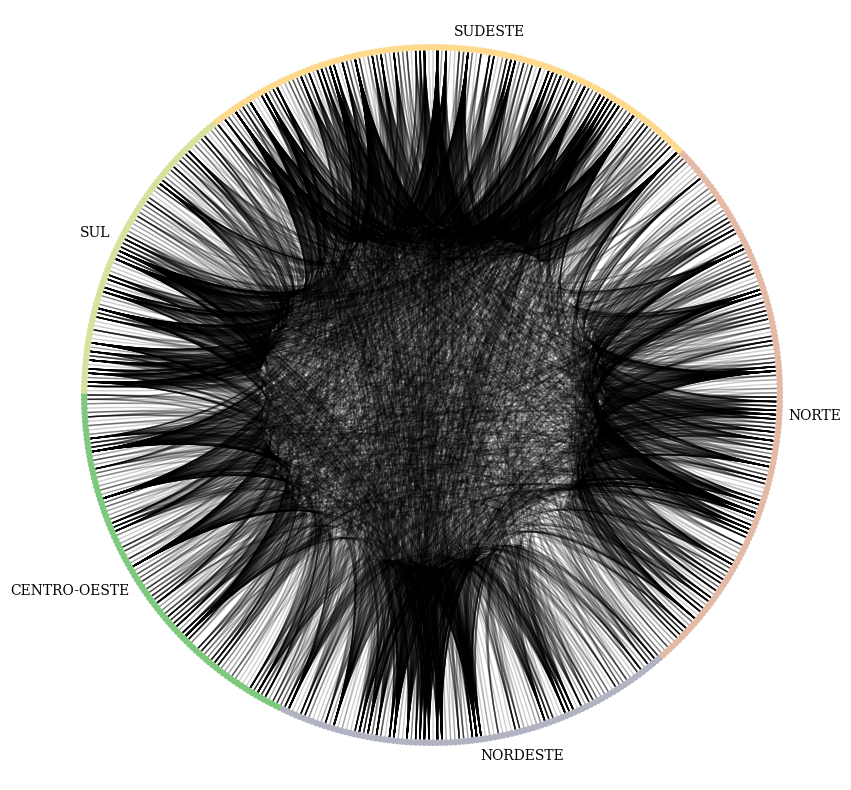

O coeficiente r:  0.36728130173582774


In [ ]:
c = nv.CircosPlot(nodesG,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(20,10))

c.draw()

plt.savefig("grafico.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()

print("O coeficiente r: ", nx.attribute_assortativity_coefficient(nodesG,"region"))

# REQUIREMENT 2

Carry out a bivariate analysis between the vertex
degree and the average number of neighbors.
Create a similar graph considering the Brazilian
network and all its Regions (North, Northeast, South,
Southeast, and Central-West). Report your main
findings.

<h4>------------------------------------------------------------------------------------------------------------------------------------------------------------
<h4> Bivariate graph analysis refers to the study and exploration of relationships between pairs of nodes in a complex network. Rather than analyzing the properties of a single node in isolation, bivariate analysis considers the interaction between two nodes and examines how these interactions can affect the structure and functioning of the network.

In bivariate analysis, researchers investigate various characteristics and properties of pairs of nodes, such as attribute similarity, connection patterns, dynamic interactions, or statistical correlations. Some common examples of bivariate analysis on graphs include:


<h2> Brasil

In [ ]:
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


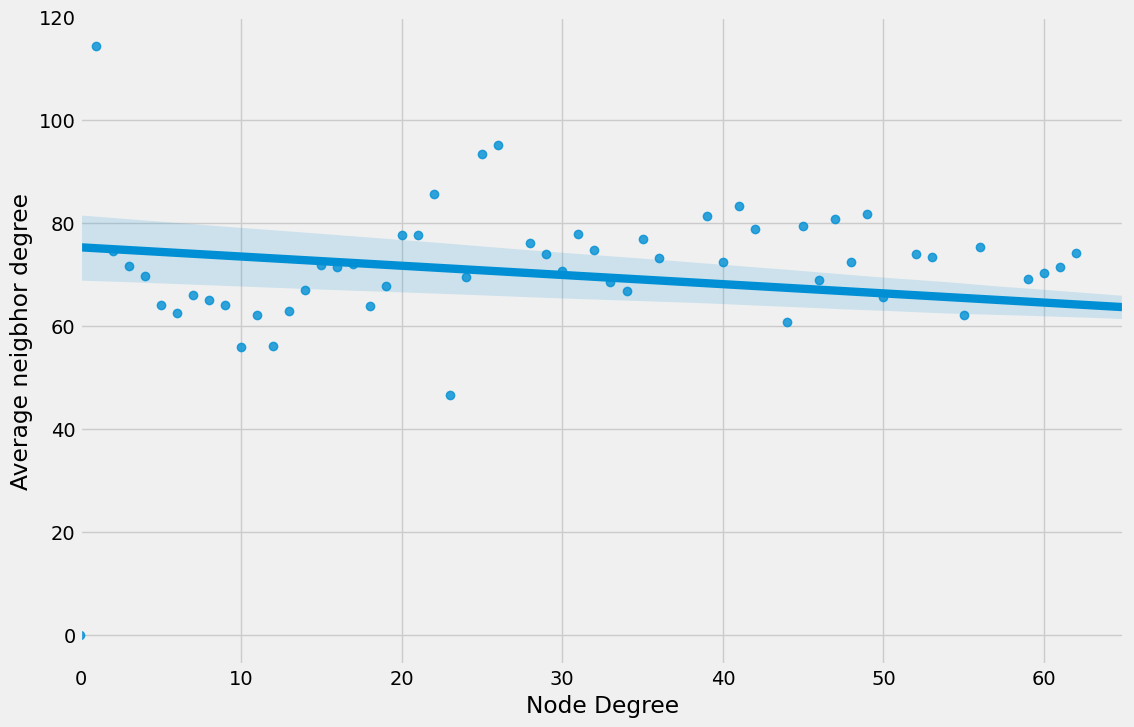

Valor de assortatividade:  0.36728130173582757


In [ ]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()
print("Valor de assortatividade: ", str(nx.attribute_assortativity_coefficient(G,"region")))

<h2> Sul

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


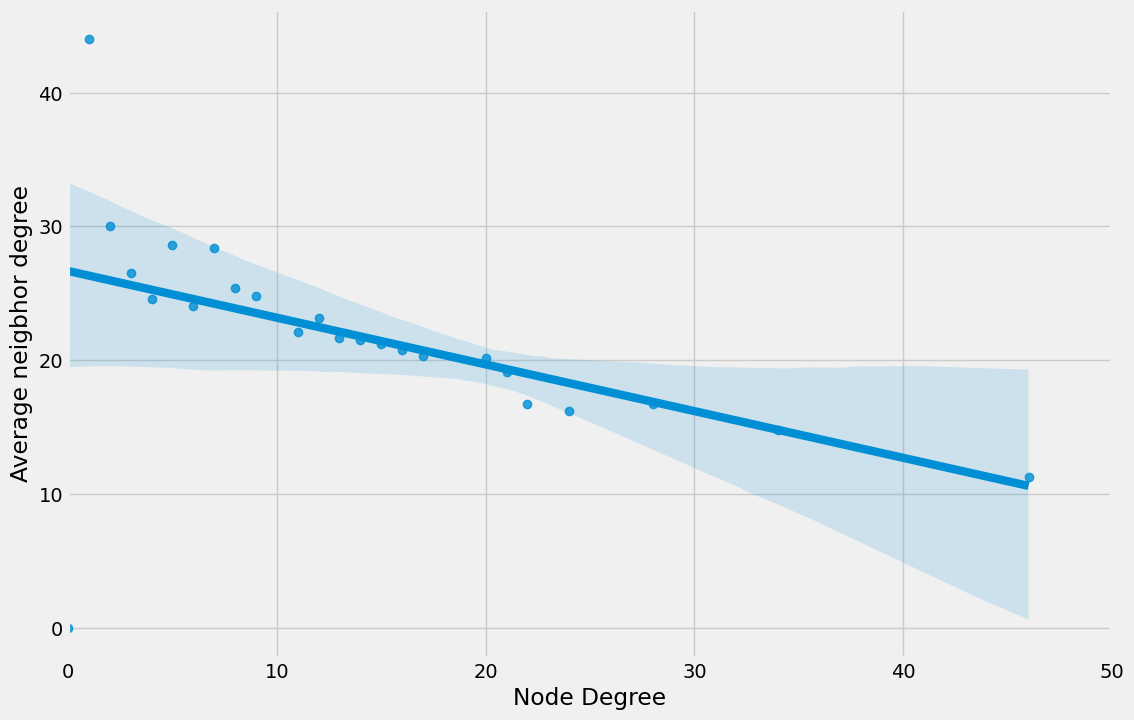

Valor de assortatividade:  -0.40181381306857755


In [ ]:
n_sul = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'SUL':
      n_sul.append(i)
G_sul = G.subgraph(n_sul)

# average degree of neighbors
d_sul, avg_neigh_d_sul = zip(*nx.average_degree_connectivity(G_sul).items())

# convert to list
d_sul = list(d_sul)
avg_neigh_d_sul = list(avg_neigh_d_sul)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_sul,avg_neigh_d_sul,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,50)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_sul,"region")))

<h2> Sudeste

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


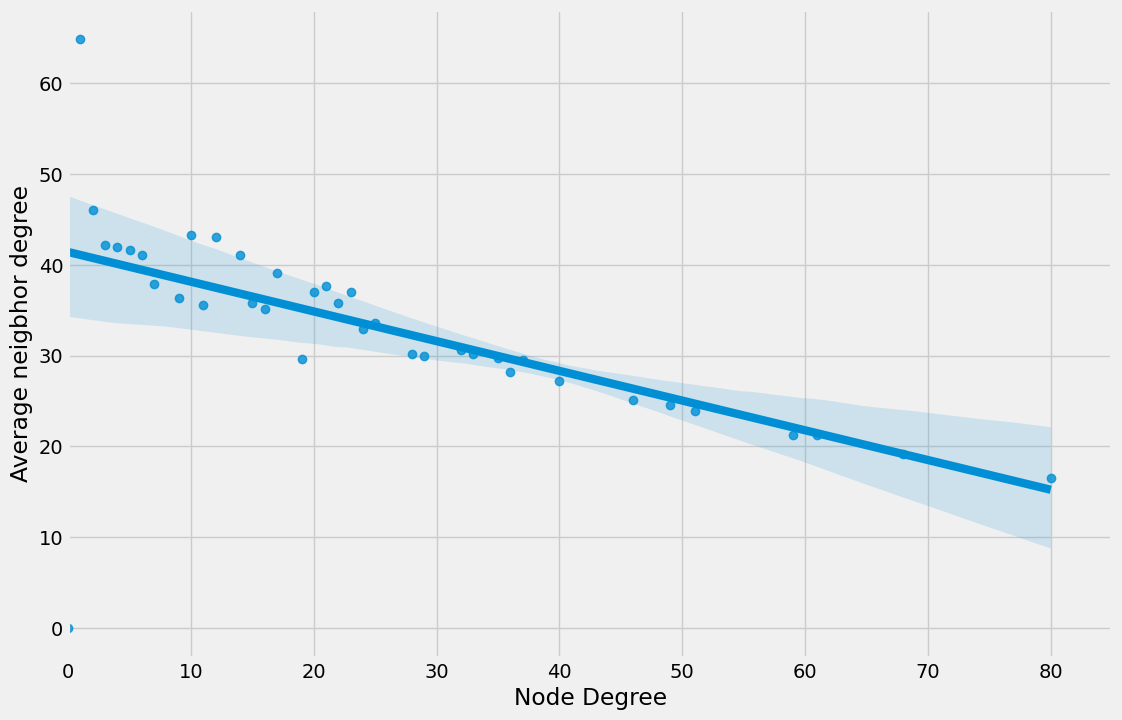

Valor de assortatividade:  -0.3687746079424212


In [ ]:
n_sudeste = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'SUDESTE':
      n_sudeste.append(i)
G_sudeste = G.subgraph(n_sudeste)

# average degree of neighbors
d_sudeste, avg_neigh_d_sudeste = zip(*nx.average_degree_connectivity(G_sudeste).items())

# convert to list
d_sudeste = list(d_sudeste)
avg_neigh_d_sudeste = list(avg_neigh_d_sudeste)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_sudeste,avg_neigh_d_sudeste,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,85)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_sudeste,"region")))

<h2> Centro-Oeste

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


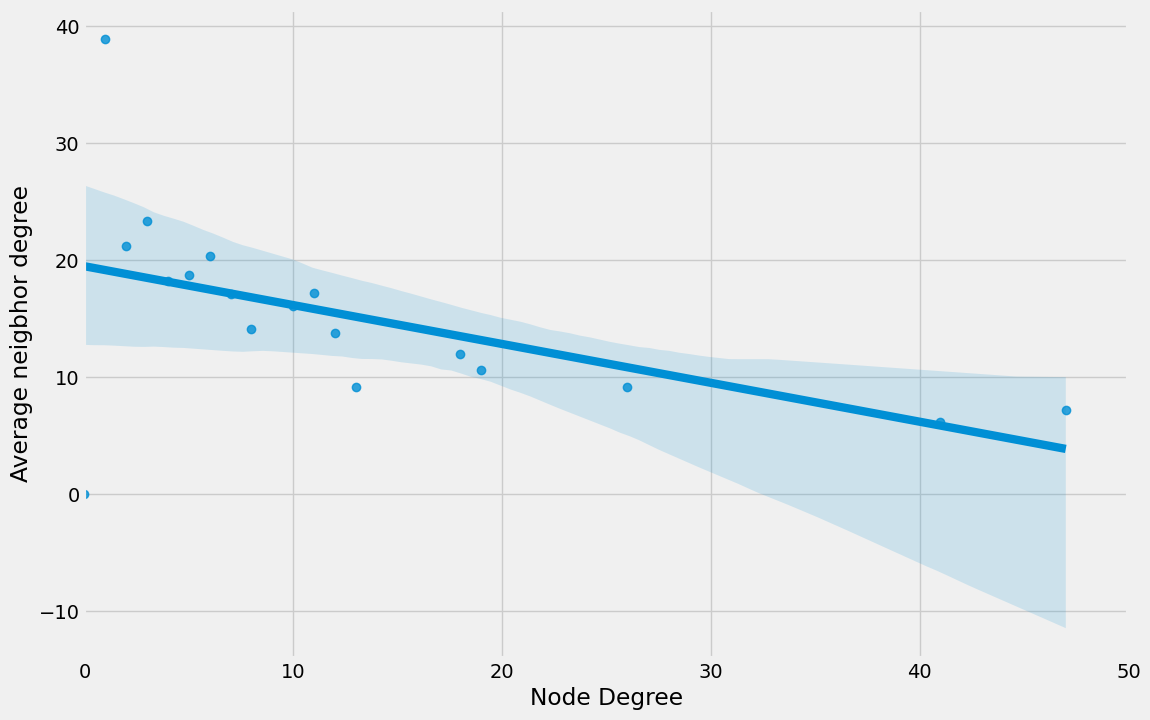

Valor de assortatividade:  -0.3542839902086467


In [ ]:
n_centro_oeste = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'CENTRO-OESTE':
      n_centro_oeste.append(i)
G_centro_oeste = G.subgraph(n_centro_oeste)

# average degree of neighbors
d_centro_oeste, avg_neigh_d_centro_oeste = zip(*nx.average_degree_connectivity(G_centro_oeste).items())

# convert to list
d_centro_oeste = list(d_centro_oeste)
avg_neigh_d_centro_oeste = list(avg_neigh_d_centro_oeste)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_centro_oeste,avg_neigh_d_centro_oeste,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,50)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_centro_oeste,"region")))

<h2> Nordeste

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


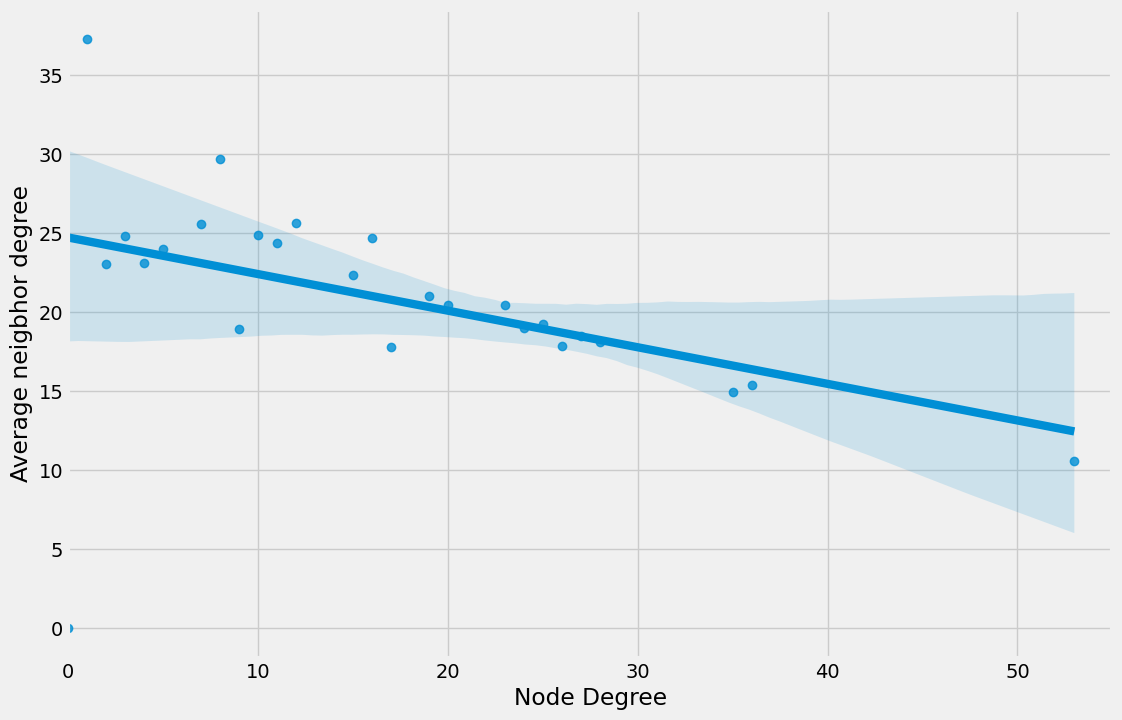

Valor de assortatividade:  -0.33375735918340366


In [ ]:
n_nordeste = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'NORDESTE':
      n_nordeste.append(i)
G_nordeste = G.subgraph(n_nordeste)

# average degree of neighbors
d_nordeste, avg_neigh_d_nordeste = zip(*nx.average_degree_connectivity(G_nordeste).items())

# convert to list
d_nordeste = list(d_nordeste)
avg_neigh_d_nordeste = list(avg_neigh_d_nordeste)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_nordeste,avg_neigh_d_nordeste,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,55)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_nordeste,"region")))

<h2> Norte

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


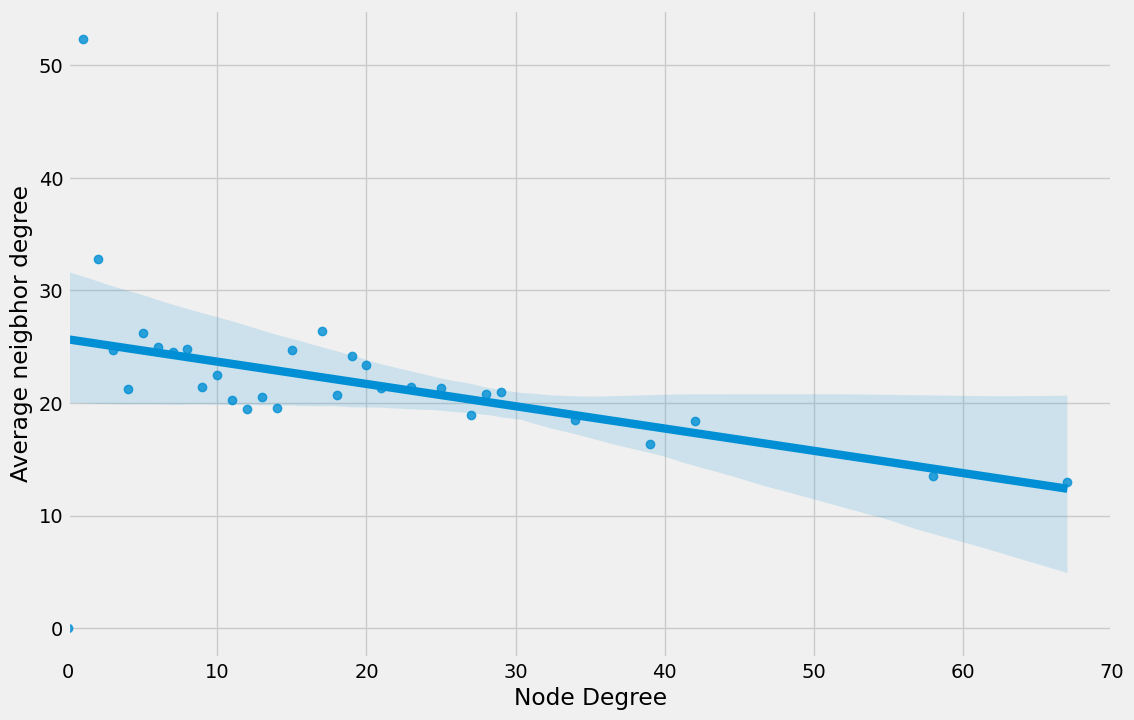

Valor de assortatividade:  -0.22193985877089423


In [ ]:
n_norte = []
for i in G.nodes():
    if G.nodes[i]['region'] == 'NORTE':
      n_norte.append(i)
G_norte = G.subgraph(n_norte)

# average degree of neighbors
d_norte, avg_neigh_d_norte = zip(*nx.average_degree_connectivity(G_norte).items())

# convert to list
d_norte = list(d_norte)
avg_neigh_d_norte = list(avg_neigh_d_norte)

# Plot graph
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(d_norte,avg_neigh_d_norte,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,70)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)
plt.show()
print("Valor de assortatividade: ", str(nx.degree_assortativity_coefficient(G_norte,"region")))

In [ ]:
nx.degree_assortativity_coefficient(G)

-0.2017097172979742

#REQUERIMENT 3

Determine how many connected components exist
in the Brazilian air network. Characterize
each component: quantity, percentage by
region.

In [ ]:
def component_information(component):
  regioes = {"NORTE": 0, "NORDESTE": 0, "CENTRO-OESTE": 0, "SUL": 0, "SUDESTE": 0}
  for node in component:
    region = G.nodes[node]['region']
    if region in regioes:
      regioes[region] += 1
    else:
      regioes[region] = 0
  print(regioes)  

  N = regioes['NORTE']
  NE = regioes['NORDESTE']
  CO = regioes['CENTRO-OESTE']
  SE = regioes['SUDESTE']
  S = regioes['SUL']

  total = N + NE + CO + SE + S
  print("\nRegião Norte:")
  print("Componentes conectados:", N)
  print("Porcentagem de componentes conectados:", N * 100 / total)

  print("\nRegião Nordeste:")
  print("Componentes conectados:", NE)
  print("Porcentagem de componentes conectados:", NE * 100 / total)

  print("\nRegião Centro-Oeste:")
  print("Componentes conectados:", CO)
  print("Porcentagem de componentes conectados:", CO * 100 / total)

  print("\nRegião Sudeste:")
  print("Componentes conectados:", SE)
  print("Porcentagem de componentes conectados:", SE * 100 / total)

  print("Região Sul:")
  print("Componentes conectados:", S)
  print("Porcentagem de componentes conectados:", S * 100 / total)


In [ ]:
for component in nx.connected_components(nodesG):
    component_information(component)

{'NORTE': 126, 'NORDESTE': 92, 'CENTRO-OESTE': 88, 'SUL': 70, 'SUDESTE': 115}

Região Norte:
Componentes conectados: 126
Porcentagem de componentes conectados: 25.661914460285132

Região Nordeste:
Componentes conectados: 92
Porcentagem de componentes conectados: 18.73727087576375

Região Centro-Oeste:
Componentes conectados: 88
Porcentagem de componentes conectados: 17.922606924643585

Região Sudeste:
Componentes conectados: 115
Porcentagem de componentes conectados: 23.421588594704684
Região Sul:
Componentes conectados: 70
Porcentagem de componentes conectados: 14.256619144602851
{'NORTE': 1, 'NORDESTE': 0, 'CENTRO-OESTE': 0, 'SUL': 0, 'SUDESTE': 0}

Região Norte:
Componentes conectados: 1
Porcentagem de componentes conectados: 100.0

Região Nordeste:
Componentes conectados: 0
Porcentagem de componentes conectados: 0.0

Região Centro-Oeste:
Componentes conectados: 0
Porcentagem de componentes conectados: 0.0

Região Sudeste:
Componentes conectados: 0
Porcentagem de componentes conecta

# REQUIREMENT 4

Create a simulated scenario where a trip with
the following route is desired:

  - City 1 (North) to City 2 (South)

  - City 2 (South) to City 3 (Northeast)

  - City 3 (Northeast) to City 4 (Central-West)

  - City 4 (Central-West) to City 5 (Southeast)

In [ ]:
G_norte.nodes(data=True)
G_nordeste.nodes(data=True)
G_sul.nodes(data=True)
G_sudeste.nodes(data=True)
G_centro_oeste.nodes(data=True)

NodeDataView({'SSBE': {'name': 'CAMAPUÃ', 'country': 'BRASIL', 'latitude': '-19.598400115966797', 'longitude': '-54.02109909057617', 'state': 'MS', 'region': 'CENTRO-OESTE'}, 'SSCL': {'name': 'CASSILÂNDIA', 'country': 'BRASIL', 'latitude': '-19.146861', 'longitude': '-51.676941', 'state': 'MS', 'region': 'CENTRO-OESTE'}, 'SWVR': {'name': 'SINOP', 'country': 'BRASIL', 'latitude': '-11.906131', 'longitude': '-55.456099', 'state': 'MT', 'region': 'CENTRO-OESTE'}, 'SSTL': {'name': 'TRÊS LAGOAS', 'country': 'BRASIL', 'latitude': '-20.754199981689', 'longitude': '-51.684200286865', 'state': 'MS', 'region': 'CENTRO-OESTE'}, 'SBIT': {'name': 'ITUMBIARA', 'country': 'BRASIL', 'latitude': '-18.4447002411', 'longitude': '-49.2134017944', 'state': 'GO', 'region': 'CENTRO-OESTE'}, 'SBCR': {'name': 'CORUMBÁ', 'country': 'BRASIL', 'latitude': '-19.0119438171', 'longitude': '-57.6713905334', 'state': 'MS', 'region': 'CENTRO-OESTE'}, 'SWNQ': {'name': 'NIQUELÂNDIA', 'country': 'BRASIL', 'latitude': '-14

In [ ]:
destinos = {    
    'destino_norte': 'SBBE',         # BELÉM
    'destino_nordeste': 'SBSG',      # SÃO GONÇALO DO AMARANTE
    'destino_sul': 'SBGS',           # PONTA GROSSA
    'destino_sudeste': 'SDMC',       # MARICÁ
    'destino_centro_oeste': 'SIQE'   # BRASÍLIA
    } 

In [ ]:
# Viagem 1
caminho = nx.shortest_path(G, destinos['destino_norte'], destinos['destino_sul'])
print("Viagem 1 (Belém -> Ponta Grossa): ")
print(caminho)
print(f"{G.nodes[caminho[0]]['name']} -> {G.nodes[caminho[1]]['name']} -> {G.nodes[caminho[2]]['name']}\n")

# Viagem 2
caminho = nx.shortest_path(G, destinos['destino_sul'], destinos['destino_nordeste'])
print("Viagem 2 (Ponta Grossa -> São Gonçalo do Amarante): ")
print(caminho)
print(f"{G.nodes[caminho[0]]['name']} -> {G.nodes[caminho[1]]['name']} -> {G.nodes[caminho[2]]['name']}\n")

# Viagem 3
print("Viagem 3 (São Gonçalo do Amarante -> Brasília): ")
caminho = nx.shortest_path(G, destinos['destino_nordeste'], destinos['destino_centro_oeste'])
print(caminho)
print(f"{G.nodes[caminho[0]]['name']} -> {G.nodes[caminho[1]]['name']} -> {G.nodes[caminho[2]]['name']}\n")

# Viagem 4
print("Viagem 4 (Brasília -> Maricá): ")
caminho = nx.shortest_path(G, destinos['destino_centro_oeste'], destinos['destino_sudeste'])
print(caminho)
print(f"{G.nodes[caminho[0]]['name']} -> {G.nodes[caminho[1]]['name']} -> {G.nodes[caminho[2]]['name']} -> {G.nodes[caminho[3]]['name']}")

Viagem 1 (Belém -> Ponta Grossa): 
['SBBE', 'SBCT', 'SBGS']
BELÉM -> SÃO JOSÉ DOS PINHAIS -> PONTA GROSSA

Viagem 2 (Ponta Grossa -> São Gonçalo do Amarante): 
['SBGS', 'SBCT', 'SBSG']
PONTA GROSSA -> SÃO JOSÉ DOS PINHAIS -> SÃO GONÇALO DO AMARANTE

Viagem 3 (São Gonçalo do Amarante -> Brasília): 
['SBSG', 'SBGO', 'SIQE']
SÃO GONÇALO DO AMARANTE -> GOIÂNIA -> BRASÍLIA

Viagem 4 (Brasília -> Maricá): 
['SIQE', 'SBGO', 'SBGL', 'SDMC']
BRASÍLIA -> GOIÂNIA -> RIO DE JANEIRO -> MARICÁ


# REQUIREMENT 5

<h3> Conduct a study on the Clustering Coefficient
considering the National Air Network, as well as
the individual air sub-networks of each Region
(North, Northeast, Central-West, South, and
Southeast).

<h4>------------------------------------------------------------------------------------------------------------------------------------------------------------
<h4>The clustering coefficient is a measure used in graphs to quantify the degree of local clustering of a node or the network as a whole. It measures the tendency of a node's neighbors to be interconnected, forming groups or clusters.

The clustering coefficient of a node is calculated as the ratio between the number of existing edges between the neighbors of this node and the maximum number of possible edges between these neighbors. This measure is normalized to a value between 0 and 1.

<h2> Brasil

In [ ]:
nx.average_clustering(G_br)

0.6230508002369364

<h2> Regiões

<h3> Sul

In [73]:
nodes_sul = [node for node in nodesG.nodes() if nodesG.nodes[node]['region'] == "SUL"]
G_sul = nodesG.subgraph(nodes_sul)

average_clustering = nx.average_clustering(G_sul)
print(average_clustering)


0.5979416718387067


<h3> Norte

In [74]:
nodes_norte = [node for node in nodesG.nodes() if nodesG.nodes[node]['region'] == "NORTE"]
G_norte = nodesG.subgraph(nodes_norte)

average_clustering = nx.average_clustering(G_norte)
print(average_clustering)


0.6159653188854738


<h3> Nordeste

In [75]:
nodes_nordeste = [node for node in nodesG.nodes() if nodesG.nodes[node]['region'] == "NORDESTE"]
G_nordeste = nodesG.subgraph(nodes_nordeste)

average_clustering = nx.average_clustering(G_nordeste)
print(average_clustering)


0.43807384418290296


<h3> Sudeste

In [77]:
nodes_sudeste = [node for node in nodesG.nodes() if nodesG.nodes[node]['region'] == "SUDESTE"]
G_sudeste = nodesG.subgraph(nodes_sudeste)

average_clustering = nx.average_clustering(G_sudeste)
print(average_clustering)


0.6186700538769274


<h3> Centro-Oeste

In [79]:
nodes_centrooeste = [node for node in nodesG.nodes() if nodesG.nodes[node]['region'] == "CENTRO-OESTE"]
G_centrooeste = nodesG.subgraph(nodes_centrooeste)

average_clustering = nx.average_clustering(G_centrooeste)
print(average_clustering)


0.5618772358860066
